<a href="https://colab.research.google.com/github/atanuc073/Genrative-AI-development-and-deployment/blob/main/Prod_Finetuning_TinyStories_HF_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vizuara Finetuning Part 1: TinyStories Dataset finetuning

## Part 1: Inference without finetuning

### Step 0: Loading packages

In [ ]:
!pip install transformers -qq
!pip install huggingface_hub -qq
!pip install datasets -qq
!pip install accelerate -qq
!pip install evaluate -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.5 MB/s eta 0:00:00


### Step 1: Load the TinyStories Model

In [ ]:
import torch
from datasets import load_dataset
from transformers import pipeline, logging

logging.set_verbosity_error()

torch.cuda.set_device(0)

model_name = "roneneldan/TinyStories-Instruct-33M"

# create pipeline
pipe = pipeline(
    "text-generation",
    model=model_name,
    device_map="auto",
    trust_remote_code=True
)

config.json:   0%|          | 0.00/968 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/291M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

### Step 2: Run inference on the TinyStories model

In [ ]:
prompt = """
Summary: Lily and Timmy build a sandcastle together and learn to compromise, but it gets knocked over by a gust of wind.
They find beauty in the broken sandcastle and play happily with a butterfly.
Features: Dialogue, Foreshadowing, Twist
Sentence: One day, she went to the park and saw a beautiful butterfly.
Words: disagree, network, beautiful
Story: """

In [ ]:
output = pipe(
    prompt,
    max_new_tokens=200,
    do_sample=True,
    temperature=0.3,
    return_full_text=False)

print(output[0]["generated_text"])



Once upon a time, there were two best friends, Lily and Timmy. They were always together and loved to play. One day, they decided to build a sandcastle. Lily wanted to make the sandcastle look beautiful, while Timmy wanted to make the walls of the sandcastle.

Lily said, "Let's make the walls of the sandcastle, Timmy. It will look so beautiful!"

But Timmy disagreed. He said, "No, I don't want to make the walls. I want to make the sandcastle!"

Lily was sad, but she didn't give up. She said, "Let's make the walls of the sandcastle, Timmy. It will look beautiful!"

So they started to build the walls. They worked together and soon the sandcastle was finished. It looked so beautiful.

But then something unexpected happened. A gust of wind blew and knocked the sandcastle down. Lily


In [ ]:
prompt = "What color is an apple?"


In [ ]:
output = pipe(
    prompt,
    max_new_tokens=200,
    do_sample=True,
    temperature=0.3,
    return_full_text=False)

print(output[0]["generated_text"])

”

The little girl said, “It’s a red apple.”

The man said, “That’s right. It’s a red apple. Do you want to try it?”

The little girl said, “Yes please!”

The man gave her the apple and she took a bite. She smiled and said, “It’s so yummy!”

The man said, “I’m glad you like it.”

The little girl said, “Thank you!”

The man smiled and said, “You’re welcome. I’m glad you like it.”

The little girl said goodbye and went on her way. She was very happy with her red apple.



### Step 3: Check ability of model to follow instructions

In [ ]:
prompt = "What color is a banana? Respond with one word"

In [ ]:
output = pipe(
    prompt,
    max_new_tokens=2,
    do_sample=True,
    temperature=0.3,
    return_full_text=False)

print(output[0]["generated_text"])

?"



In [ ]:
prompt = "What color is an orange? Respond with one word"

In [ ]:
output = pipe(
    prompt,
    max_new_tokens=10,
    do_sample=True,
    temperature=0.3,
    return_full_text=False)

print(output[0]["generated_text"])

?"

Lily thought for a moment and


Trying different simple prompts (with different temperature levels) yields unsatisfactory results. The model is not following the given instruction.

### Step 4: Check ability of model to follow financial data sentiment analysis tasks

In [ ]:
promptM = """Your task is to analyze the sentiment (from an investor's perspective) of the text below.

Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.

Examples:

Instruct: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output: neutral

Instruct: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output: positive

Instruct: Jan. 6 -- Ford is struggling in the face of slowing truck and SUV sales and a surfeit of up-to-date , gotta-have cars .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output: negative

Instruct: At the request of Finnish media company Alma Media 's newspapers , research manager Jari Kaivo-oja at the Finland Futures Research Centre at the Turku School of Economics has drawn up a future scenario for Finland 's national economy by using a model developed by the University of Denver .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output: neutral

Instruct: STOCK EXCHANGE ANNOUNCEMENT 20 July 2006 1 ( 1 ) BASWARE SHARE SUBSCRIPTIONS WITH WARRANTS AND INCREASE IN SHARE CAPITAL A total of 119 850 shares have been subscribed with BasWare Warrant Program .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output: neutral

Instruct: A maximum of 666,104 new shares can further be subscribed for by exercising B options under the 2004 stock option plan .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output: neutral

Instruct: In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output:"""

In [ ]:
output = pipe(
    promptM,
    max_new_tokens=5,
    do_sample=True,
    temperature=0.3,
    return_full_text=False)

print(output[0]["generated_text"])

 `ididancy



Nope! That doesn’t seem to work. I’ll give it a simpler prompt:


In [ ]:
prompt = """Your task is to analyze the sentiment (from an investor's perspective) of the text below.

Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
Respond with only one of these words: negative, positive, or neutral. If the amount of money is not explicitly increasing or decreasing, respond with neutral.
Output:"""


In [ ]:
output = pipe(
    prompt,
    max_new_tokens=5,
    do_sample=True,
    temperature=0.3,
    return_full_text=False)

print(output[0]["generated_text"])


Summary: Two countries


TinyInstruct-33M does not seem aligned to this type of instruction following. As a final party trick I’ll see if setting up the financial_phrasebank data in the model’s training format nudges it in the right direction.

In [ ]:
prompt = """Summary: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier,
while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
Features: positive
Sentence: positive
Words: positive
Story: """

In [ ]:
output = pipe(
    prompt,
    max_new_tokens=100,
    do_sample=True,
    temperature=0.2,
    return_full_text=False)

print(output[0]["generated_text"])



Once upon a time there was a little girl called Athena. She was three years old and loved playing with her friends. One day, Athena's friends asked her to come to the park with them. She was so excited!

Athenelaces were on the other side of the park, but there was one thing that made her very happy: Aimeeregrine: Aime Lambl!

Ada's friends were all very excited to see her. They asked


In [ ]:
prompt = """Summary: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier,
while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
Features: respond with one word (negative, positive, neutral)
Sentence: respond with one word (negative, positive, neutral)
Words: respond with one word (negative, positive, neutral)
Story: """

In [ ]:
output = pipe(
    prompt,
    max_new_tokens=100,
    do_sample=True,
    temperature=0.1,
    return_full_text=False)

print(output[0]["generated_text"])



Once upon a time there was a small girl named Athena. She was three years old and loved to explore the world around her. One day, Athena noticed a large sign that said 'lungING'. She was curious and asked her mom what it meant. Her mom explained that it was a sign of a year ago, when two countries were born.

Athenelaceaces were owned by a government pharaohs called Receiversistic. They had a special job to


Conclusion: This was probably the least exciting LLM exercise I’ve ever done, but I felt it was necessary to at least give TinyInstruct-33M a fair shot at classifying financial_phrasebank sentiment without fine-tuning it.


## Part 2: Inference with finetuning

### Step 0: Loading packages

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, TrainerCallback
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

import gc
def report_gpu():
    print(torch.cuda.list_gpu_processes())
    gc.collect()
    torch.cuda.empty_cache()



### Step 1: Loading model and tokenizer

In [ ]:
model_nm = "roneneldan/TinyStories-33M"
#model_nm = "roneneldan/TinyStories-1M"
#model_nm = "roneneldan/TinyStories-3M"
#model_nm = "roneneldan/TinyStories-8M"

tokz = AutoTokenizer.from_pretrained(model_nm)
def tok_func(x): return tokz(x["input"], padding=True, truncation=True)

tokenizer_config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

### Step 2: Load financial phrasebank dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("FinanceMTEB/financial_phrasebank", split="train")
print(dataset)



README.md:   0%|          | 0.00/465 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/104k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/80.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1264 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label_text', 'label'],
    num_rows: 1264
})


### Step 3: Rename dataset columns to match with HF finetuning

In [ ]:
dataset = dataset.rename_columns({
    'label': 'labels',
    'text': 'input'
})


### Step 4: Add padding tokens to tokenizer for batching during finetuning

In [ ]:
tokz.add_special_tokens({'pad_token': '[PAD]'})
tokz.padding_side = "left" # https://github.com/huggingface/transformers/issues/16595 and https://www.kaggle.com/code/baekseungyun/gpt-2-with-huggingface-pytorch



### Step 5: Tokenize our dataset using the tokenizer

In [ ]:
tok_ds = dataset.map(tok_func, batched=True)
tok_ds

Map:   0%|          | 0/1264 [00:00<?, ? examples/s]

Dataset({
    features: ['input', 'label_text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 1264
})

In [ ]:
tok_ds[0]['input']


'The Samsung Mobile Applications Store was launched in January 2009 by Samsung Mobile Innovator , a program which enables mobile software developers to create applications for use across Samsung mobile devices .'

In [ ]:
tok_ds[0]['input_ids'][100:110] # first 100 elements are 50257 ('[PAD]')


[12173, 26622, 9363, 373, 5611, 287, 3269, 3717, 416, 10397]

In [ ]:
tok_ds[0]['labels']


1

### Step 6: Split dataset into training, validation and testing

In [ ]:
split_dataset = tok_ds.train_test_split(test_size=225/2264, seed=42)

training_split = split_dataset['train'].train_test_split(test_size=0.2, seed=42)

train_ds = training_split['train']
eval_ds = training_split['test']
test_ds = split_dataset['test']

train_ds, eval_ds, test_ds

(Dataset({
     features: ['input', 'label_text', 'labels', 'input_ids', 'attention_mask'],
     num_rows: 910
 }),
 Dataset({
     features: ['input', 'label_text', 'labels', 'input_ids', 'attention_mask'],
     num_rows: 228
 }),
 Dataset({
     features: ['input', 'label_text', 'labels', 'input_ids', 'attention_mask'],
     num_rows: 126
 }))

In [ ]:
train_ds[0]['input']


'The value of the contracts is about EUR 3.3 mn .'

In [ ]:
train_ds[0]['labels']


1

In [ ]:
train_ds.to_pandas()['labels'].value_counts() / len(train_ds)


,count
labels,
1,0.623077
2,0.247253
0,0.129670


In [ ]:
eval_ds.to_pandas()['labels'].value_counts() / len(eval_ds)


,count
labels,
1,0.583333
2,0.298246
0,0.118421


In [ ]:
test_ds.to_pandas()['labels'].value_counts() / len(test_ds)


,count
labels,
1,0.626984
2,0.214286
0,0.158730


### Step 7: Define hyperparameters for finetuning

In [ ]:
lr = 8e-5
#lr = 80e-5
#lr = 0.8e-5
epochs = 3
bs = 16

### Step 8: Define evaluation metrics

In [ ]:
def get_acc(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": (predictions == labels).astype(np.float32).mean().item()}

In [ ]:
# thanks Claude

class MetricCallback(TrainerCallback):
    def __init__(self):
        self.metrics = []
        self.current_epoch_metrics = {}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            self.current_epoch_metrics.update(logs)

    def on_epoch_end(self, args, state, control, **kwargs):
        if hasattr(state, 'log_history') and state.log_history:
            # Get the last logged learning rate
            last_lr = state.log_history[-1].get('learning_rate', None)
        else:
            last_lr = None

        self.metrics.append({
            "epoch": state.epoch,
            "learning_rate": last_lr,
            **self.current_epoch_metrics
        })
        self.current_epoch_metrics = {}  # Reset for next epoch

    def on_train_end(self, args, state, control, **kwargs):
        # Capture final metrics after the last epoch
        if self.current_epoch_metrics:
            self.metrics.append({
                "epoch": state.num_train_epochs,
                "learning_rate": self.metrics[-1].get('learning_rate') if self.metrics else None,
                **self.current_epoch_metrics
            })

In [ ]:
metric_callback = MetricCallback()

### Step 9: Define the HuggingFace SFT Trainer

In [ ]:
args = TrainingArguments(
    'outputs',
    learning_rate=lr,
    warmup_ratio=0.1,
    lr_scheduler_type='cosine',
    fp16=True,
    eval_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=bs,
    per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs,
    weight_decay=0.01,
    report_to='none')

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=3) # 3 labels for 3 classes

##Uses DataCollatorWithPadding under the hood

trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,
                  tokenizer=tokz, compute_metrics=get_acc, callbacks=[metric_callback])

config.json:   0%|          | 0.00/968 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

/tmp/ipython-input-3204462827.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


In [ ]:
model.resize_token_embeddings(len(tokz)) # do this otherwise I get a "index out of range" error


Embedding(50258, 768)

In [ ]:
model.config.pad_token_id = model.config.eos_token_id # do this otherwise I get an error about padding tokens


### Step 10: Perform finetuning

In [ ]:
trainer.train();


{'loss': 0.9102, 'grad_norm': 13.580547332763672, 'learning_rate': 6.842909020425789e-05, 'epoch': 1.0}
{'eval_loss': 0.5509031414985657, 'eval_accuracy': 0.7894737124443054, 'eval_runtime': 0.1249, 'eval_samples_per_second': 1824.78, 'eval_steps_per_second': 64.027, 'epoch': 1.0}
{'loss': 0.3537, 'grad_norm': 15.030338287353516, 'learning_rate': 2.5168167232161574e-05, 'epoch': 2.0}
{'eval_loss': 0.4363962709903717, 'eval_accuracy': 0.8508771657943726, 'eval_runtime': 0.1089, 'eval_samples_per_second': 2093.8, 'eval_steps_per_second': 73.467, 'epoch': 2.0}
{'loss': 0.0231, 'grad_norm': 0.21049919724464417, 'learning_rate': 8.432019856345896e-09, 'epoch': 3.0}
{'eval_loss': 0.6108958125114441, 'eval_accuracy': 0.859649121761322, 'eval_runtime': 0.1104, 'eval_samples_per_second': 2064.906, 'eval_steps_per_second': 72.453, 'epoch': 3.0}
{'train_runtime': 6.4884, 'train_samples_per_second': 420.749, 'train_steps_per_second': 26.355, 'train_loss': 0.4290016115757457, 'epoch': 3.0}


### Step 11: Print results as dataframe

In [ ]:
results = []
results.append({"learning_rate": lr, "metrics": metric_callback.metrics})

In [ ]:
def results_to_dataframe(results, model_name):
    rows = []
    for result in results:
        initial_lr = result['learning_rate']
        for metric in result['metrics']:
            row = {
                'model_name': model_name,
                'initial_learning_rate': initial_lr,
                'current_learning_rate': metric.get('learning_rate'),
            }
            row.update(metric)
            rows.append(row)

    df = pd.DataFrame(rows)

    # Ensure specific columns are at the beginning
    first_columns = ['model_name', 'initial_learning_rate', 'current_learning_rate', 'epoch']
    other_columns = [col for col in df.columns if col not in first_columns]
    df = df[first_columns + other_columns]

    return df

In [ ]:
res_df = results_to_dataframe(results, model_name="TinyStories-33M")
res_df

,model_name,initial_learning_rate,current_learning_rate,epoch,learning_rate,loss,grad_norm,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,TinyStories-33M,0.00008,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TinyStories-33M,0.00008,6.842909e-05,1.0,6.842909e-05,0.9712,14.101902,0.571306,0.745614,0.1339,1703.286,59.764,NaN,NaN,NaN,NaN,NaN
2,TinyStories-33M,0.00008,2.516817e-05,2.0,2.516817e-05,0.2772,16.621248,0.380345,0.859649,0.1106,2060.586,72.301,NaN,NaN,NaN,NaN,NaN
3,TinyStories-33M,0.00008,8.432020e-09,3.0,8.432020e-09,0.0204,0.076365,0.444670,0.872807,0.1154,1975.739,69.324,7.4417,366.851,22.979,6.082452e+13,0.422967


### Step 12: Check finetuned model on testing data

In [ ]:
test_df = test_ds.to_pandas()[['input', 'labels']]
test_df.head()

,input,labels
0,"Arvo Vuorenmaa , the Loviisa plant 's general ...",2
1,Finnish KCI Konecranes has been awarded an ord...,2
2,Rubin says he expects Capman to announce 1-2 a...,1
3,The order also includes start-up and commissio...,1
4,"The order comprises four ball mills , which wi...",1


In [ ]:
preds = trainer.predict(test_ds).predictions.astype(float)
probs = F.softmax(torch.tensor(preds), dim=1)
predicted_classes = torch.argmax(probs, dim=1).numpy()

test_df['predicted'] = predicted_classes
test_df.head()

,input,labels,predicted
0,"Arvo Vuorenmaa , the Loviisa plant 's general ...",2,1
1,Finnish KCI Konecranes has been awarded an ord...,2,2
2,Rubin says he expects Capman to announce 1-2 a...,1,2
3,The order also includes start-up and commissio...,1,1
4,"The order comprises four ball mills , which wi...",1,1


In [ ]:
test_df['match'] = test_df['labels'] == test_df['predicted']
test_df['match'].mean()

np.float64(0.8412698412698413)

### Step 13: Generate confusion matrix

In [ ]:
label_map = dict(enumerate(test_ds['label_text'][:3]))
print(label_map)
# {0: 'positive', 1: 'neutral', 2: 'negative'}


{0: 'positive', 1: 'positive', 2: 'neutral'}


In [ ]:
test_df['label_text'] = test_df['labels'].apply(lambda x: label_map[x])
test_df['pred_text'] = test_df['predicted'].apply(lambda x: label_map[x])

In [ ]:
def make_cm(df):
    """Create confusion matrix for true vs predicted sentiment classes"""

    cm = confusion_matrix(y_true=df['label_text'], y_pred=df['pred_text'], labels=['negative', 'neutral', 'positive'])
    disp = ConfusionMatrixDisplay(cm, display_labels=['negative', 'neutral', 'positive'])

    fig, ax = plt.subplots(figsize=(4,4))
    disp.plot(ax=ax,text_kw={'fontsize': 12}, cmap='Blues', colorbar=False);

    # change label font size without changing label text
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)

    # make tick labels larger
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

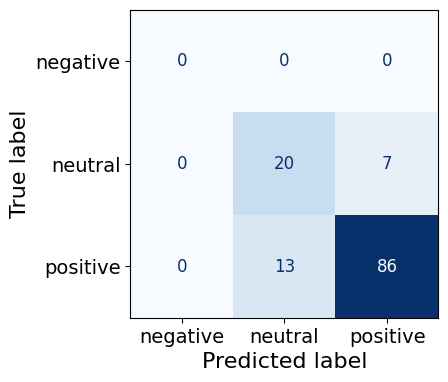

In [ ]:
make_cm(test_df)


### Step 14: Check predictions on random sentences passed through our model

In [ ]:
def get_prediction(model, text, tokz):
    # Determine the device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Move the model to the appropriate device
    model = model.to(device)

    # Tokenize the input text
    inputs = tokz(text, return_tensors="pt", truncation=True, padding=True)

    # Move input tensors to the same device as the model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get the model's prediction
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(**inputs)

    # Ensure logits are on CPU for numpy operations
    logits = outputs.logits.detach().cpu()

    # Get probabilities
    probs = torch.softmax(logits, dim=-1)

    # Get the predicted class
    p_class = torch.argmax(probs, dim=-1).item()

    # Get the probability for the predicted class
    p = probs[0][p_class].item()

    labels = {0: "negative", 1: "neutral", 2: "positive"}

    print(f"Probability: {p:.2f}")
    print(f"Predicted label: {labels[p_class]}")
    return p_class, p

In [ ]:
text = "The net sales went up from USD $3.4M to USD $5.6M since the same quarter last year"

_ = get_prediction(model, text, tokz)

Probability: 0.85
Predicted label: positive


In [ ]:
text = "The net sales went down from USD $8.9M to USD $1.2M since the same quarter last year"

_ = get_prediction(model, text, tokz)

Probability: 1.00
Predicted label: negative


In [ ]:
text = "The net sales stayed the as the same quarter last year"

_ = get_prediction(model, text, tokz)

Probability: 0.64
Predicted label: positive


### Step 15: Grid search to find best learning rate

In [ ]:
def get_trainer(lr, bs=16):

    args = TrainingArguments(
        'outputs',
        learning_rate=lr,
        warmup_ratio=0.1,
        lr_scheduler_type='cosine',
        fp16=True,
        eval_strategy="epoch",
        logging_strategy="epoch",
        per_device_train_batch_size=bs,
        per_device_eval_batch_size=bs*2,
        num_train_epochs=3,
        weight_decay=0.01,
        report_to='none')

    model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=3) # 3 labels for 3 classes
    model.resize_token_embeddings(len(tokz))
    model.config.pad_token_id = model.config.eos_token_id

    trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,
                  tokenizer=tokz, compute_metrics=get_acc, callbacks=[metric_callback])

    return trainer, args

In [ ]:
def get_test_df(trainer):
    test_df = test_ds.to_pandas()[['input', 'labels']]

    preds = trainer.predict(test_ds).predictions.astype(float)
    probs = F.softmax(torch.tensor(preds), dim=1)
    predicted_classes = torch.argmax(probs, dim=1).numpy()

    test_df['predicted'] = predicted_classes

    test_df['match'] = test_df['labels'] == test_df['predicted']
    acc = test_df['match'].mean()

    label_map = {i: label_text for i, label_text in enumerate(test_ds.features["labels"].names)}
    test_df['label_text'] = test_df['labels'].apply(lambda x: label_map[x])
    test_df['pred_text'] = test_df['predicted'].apply(lambda x: label_map[x])

    return test_df, acc

In [ ]:
metrics = []
trainers = []
learning_rates = [1e-6, 1e-5, 3e-5, 5e-5, 8e-5, 1e-4, 3e-4, 5e-4, 8e-4, 1e-3, 1e-2, 1e-1]
#padding  = [LEFT, RIGHT]
#BATCH_SIZE = []
#8*2*4 = 64

#learning_rates = [8e-5]

for lr in learning_rates:
    print(f"Learning Rate: {lr}")

    metric_callback = MetricCallback()

    trainer, args = get_trainer(lr, bs=64)

    trainer.train()

    metrics.append({
        "learning_rate": lr,
        "metrics": metric_callback.metrics
        })

    trainers.append(trainer)

    # clean up
    report_gpu()
    report_gpu()
    !rm -r /kaggle/working/outputs

Learning Rate: 1e-06


/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 1.1982, 'grad_norm': 56.91103744506836, 'learning_rate': 8.802029828000155e-07, 'epoch': 1.0}
{'eval_loss': 1.104004144668579, 'eval_accuracy': 0.4780701696872711, 'eval_runtime': 0.0872, 'eval_samples_per_second': 2613.831, 'eval_steps_per_second': 22.928, 'epoch': 1.0}
{'loss': 0.9963, 'grad_norm': 73.62985229492188, 'learning_rate': 3.454915028125263e-07, 'epoch': 2.0}
{'eval_loss': 1.0463460683822632, 'eval_accuracy': 0.5175438523292542, 'eval_runtime': 0.0869, 'eval_samples_per_second': 2623.713, 'eval_steps_per_second': 23.015, 'epoch': 2.0}
{'loss': 0.8887, 'grad_norm': 53.11846923828125, 'learning_rate': 1.541333133436018e-09, 'epoch': 3.0}
{'eval_loss': 1.0340791940689087, 'eval_accuracy': 0.5175438523292542, 'eval_runtime': 0.0873, 'eval_samples_per_second': 2610.228, 'eval_steps_per_second': 22.897, 'epoch': 3.0}
{'train_runtime': 3.8308, 'train_samples_per_second': 712.653, 'train_steps_per_second': 11.747, 'train_loss': 1.0277455223931207, 'epoch': 3.0}
GPU:0
proc

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 1.3333, 'grad_norm': 63.45058822631836, 'learning_rate': 8.802029828000157e-06, 'epoch': 1.0}
{'eval_loss': 0.916705846786499, 'eval_accuracy': 0.5745614171028137, 'eval_runtime': 0.0879, 'eval_samples_per_second': 2595.147, 'eval_steps_per_second': 22.764, 'epoch': 1.0}
{'loss': 0.4837, 'grad_norm': 32.12972640991211, 'learning_rate': 3.4549150281252635e-06, 'epoch': 2.0}
{'eval_loss': 0.7762441635131836, 'eval_accuracy': 0.6929824352264404, 'eval_runtime': 0.0866, 'eval_samples_per_second': 2632.966, 'eval_steps_per_second': 23.096, 'epoch': 2.0}
{'loss': 0.2633, 'grad_norm': 16.328929901123047, 'learning_rate': 1.541333133436018e-08, 'epoch': 3.0}
{'eval_loss': 0.771085262298584, 'eval_accuracy': 0.6885964870452881, 'eval_runtime': 0.0922, 'eval_samples_per_second': 2472.098, 'eval_steps_per_second': 21.685, 'epoch': 3.0}
{'train_runtime': 4.388, 'train_samples_per_second': 622.148, 'train_steps_per_second': 10.255, 'train_loss': 0.6934391180674235, 'epoch': 3.0}
GPU:0
proc

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 1.1832, 'grad_norm': 36.31838607788086, 'learning_rate': 2.6406089484000465e-05, 'epoch': 1.0}
{'eval_loss': 0.7329127192497253, 'eval_accuracy': 0.6842105388641357, 'eval_runtime': 0.0874, 'eval_samples_per_second': 2607.495, 'eval_steps_per_second': 22.873, 'epoch': 1.0}
{'loss': 0.287, 'grad_norm': 30.47624969482422, 'learning_rate': 1.036474508437579e-05, 'epoch': 2.0}
{'eval_loss': 0.6860349178314209, 'eval_accuracy': 0.7324561476707458, 'eval_runtime': 0.0862, 'eval_samples_per_second': 2643.52, 'eval_steps_per_second': 23.189, 'epoch': 2.0}
{'loss': 0.0469, 'grad_norm': 1.6262685060501099, 'learning_rate': 4.623999400308054e-08, 'epoch': 3.0}
{'eval_loss': 0.7028370499610901, 'eval_accuracy': 0.7149122953414917, 'eval_runtime': 0.0931, 'eval_samples_per_second': 2448.181, 'eval_steps_per_second': 21.475, 'epoch': 3.0}
{'train_runtime': 4.3692, 'train_samples_per_second': 624.824, 'train_steps_per_second': 10.299, 'train_loss': 0.5056919442282782, 'epoch': 3.0}
GPU:0
pro

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 1.2196, 'grad_norm': 24.47165870666504, 'learning_rate': 4.401014914000078e-05, 'epoch': 1.0}
{'eval_loss': 0.8407642841339111, 'eval_accuracy': 0.6622806787490845, 'eval_runtime': 0.0874, 'eval_samples_per_second': 2609.088, 'eval_steps_per_second': 22.887, 'epoch': 1.0}
{'loss': 0.3265, 'grad_norm': 24.950363159179688, 'learning_rate': 1.7274575140626318e-05, 'epoch': 2.0}
{'eval_loss': 0.6403414011001587, 'eval_accuracy': 0.75, 'eval_runtime': 0.0878, 'eval_samples_per_second': 2597.981, 'eval_steps_per_second': 22.789, 'epoch': 2.0}
{'loss': 0.0494, 'grad_norm': 4.658892631530762, 'learning_rate': 7.706665667180091e-08, 'epoch': 3.0}
{'eval_loss': 0.708444356918335, 'eval_accuracy': 0.7631579041481018, 'eval_runtime': 0.0939, 'eval_samples_per_second': 2428.85, 'eval_steps_per_second': 21.306, 'epoch': 3.0}
{'train_runtime': 4.4083, 'train_samples_per_second': 619.284, 'train_steps_per_second': 10.208, 'train_loss': 0.5318398012055291, 'epoch': 3.0}
GPU:0
process      1196

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 1.3048, 'grad_norm': 16.788625717163086, 'learning_rate': 7.041623862400125e-05, 'epoch': 1.0}
{'eval_loss': 0.7720084190368652, 'eval_accuracy': 0.6622806787490845, 'eval_runtime': 0.086, 'eval_samples_per_second': 2650.907, 'eval_steps_per_second': 23.254, 'epoch': 1.0}
{'loss': 0.3954, 'grad_norm': 15.198917388916016, 'learning_rate': 2.7639320225002108e-05, 'epoch': 2.0}
{'eval_loss': 0.5838800668716431, 'eval_accuracy': 0.7543859481811523, 'eval_runtime': 0.0866, 'eval_samples_per_second': 2632.539, 'eval_steps_per_second': 23.092, 'epoch': 2.0}
{'loss': 0.0682, 'grad_norm': 2.9828298091888428, 'learning_rate': 1.2330665067488145e-07, 'epoch': 3.0}
{'eval_loss': 0.6227481961250305, 'eval_accuracy': 0.7763158082962036, 'eval_runtime': 0.093, 'eval_samples_per_second': 2451.904, 'eval_steps_per_second': 21.508, 'epoch': 3.0}
{'train_runtime': 4.2752, 'train_samples_per_second': 638.569, 'train_steps_per_second': 10.526, 'train_loss': 0.5894604047139486, 'epoch': 3.0}
GPU:0


/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 1.3461, 'grad_norm': 12.595512390136719, 'learning_rate': 8.802029828000156e-05, 'epoch': 1.0}
{'eval_loss': 0.6340765953063965, 'eval_accuracy': 0.7587719559669495, 'eval_runtime': 0.0892, 'eval_samples_per_second': 2555.76, 'eval_steps_per_second': 22.419, 'epoch': 1.0}
{'loss': 0.3984, 'grad_norm': 18.447792053222656, 'learning_rate': 3.4549150281252636e-05, 'epoch': 2.0}
{'eval_loss': 0.5525556206703186, 'eval_accuracy': 0.780701756477356, 'eval_runtime': 0.089, 'eval_samples_per_second': 2561.085, 'eval_steps_per_second': 22.466, 'epoch': 2.0}
{'loss': 0.0522, 'grad_norm': 1.7364073991775513, 'learning_rate': 1.5413331334360182e-07, 'epoch': 3.0}
{'eval_loss': 0.5598077178001404, 'eval_accuracy': 0.7894737124443054, 'eval_runtime': 0.0929, 'eval_samples_per_second': 2454.194, 'eval_steps_per_second': 21.528, 'epoch': 3.0}
{'train_runtime': 5.3079, 'train_samples_per_second': 514.332, 'train_steps_per_second': 8.478, 'train_loss': 0.5989077991909451, 'epoch': 3.0}
GPU:0
pr

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 1.8383, 'grad_norm': 6.157430648803711, 'learning_rate': 0.00026406089484000466, 'epoch': 1.0}
{'eval_loss': 0.6735479831695557, 'eval_accuracy': 0.7412280440330505, 'eval_runtime': 0.0887, 'eval_samples_per_second': 2570.267, 'eval_steps_per_second': 22.546, 'epoch': 1.0}
{'loss': 0.564, 'grad_norm': 4.808929920196533, 'learning_rate': 0.0001036474508437579, 'epoch': 2.0}
{'eval_loss': 0.5515239834785461, 'eval_accuracy': 0.7850877046585083, 'eval_runtime': 0.0861, 'eval_samples_per_second': 2648.601, 'eval_steps_per_second': 23.233, 'epoch': 2.0}
{'loss': 0.1988, 'grad_norm': 1.8845326900482178, 'learning_rate': 4.623999400308054e-07, 'epoch': 3.0}
{'eval_loss': 0.47806891798973083, 'eval_accuracy': 0.8333333134651184, 'eval_runtime': 0.0944, 'eval_samples_per_second': 2415.683, 'eval_steps_per_second': 21.19, 'epoch': 3.0}
{'train_runtime': 4.1901, 'train_samples_per_second': 651.543, 'train_steps_per_second': 10.74, 'train_loss': 0.867048258251614, 'epoch': 3.0}
GPU:0
proc

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 2.4682, 'grad_norm': 5.647026062011719, 'learning_rate': 0.0004401014914000078, 'epoch': 1.0}
{'eval_loss': 0.8997101187705994, 'eval_accuracy': 0.5833333134651184, 'eval_runtime': 0.0873, 'eval_samples_per_second': 2612.231, 'eval_steps_per_second': 22.914, 'epoch': 1.0}
{'loss': 0.7692, 'grad_norm': 9.573261260986328, 'learning_rate': 0.00017274575140626317, 'epoch': 2.0}
{'eval_loss': 0.6614298224449158, 'eval_accuracy': 0.6929824352264404, 'eval_runtime': 0.0872, 'eval_samples_per_second': 2615.84, 'eval_steps_per_second': 22.946, 'epoch': 2.0}
{'loss': 0.4914, 'grad_norm': 3.421666145324707, 'learning_rate': 7.70666566718009e-07, 'epoch': 3.0}
{'eval_loss': 0.6203445196151733, 'eval_accuracy': 0.7412280440330505, 'eval_runtime': 0.0877, 'eval_samples_per_second': 2599.281, 'eval_steps_per_second': 22.801, 'epoch': 3.0}
{'train_runtime': 4.2004, 'train_samples_per_second': 649.946, 'train_steps_per_second': 10.713, 'train_loss': 1.2429250717163085, 'epoch': 3.0}
GPU:0
proc

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 3.1363, 'grad_norm': 11.867825508117676, 'learning_rate': 0.0007041623862400125, 'epoch': 1.0}
{'eval_loss': 1.635769009590149, 'eval_accuracy': 0.5833333134651184, 'eval_runtime': 0.0896, 'eval_samples_per_second': 2545.88, 'eval_steps_per_second': 22.332, 'epoch': 1.0}
{'loss': 1.0878, 'grad_norm': 9.415618896484375, 'learning_rate': 0.0002763932022500211, 'epoch': 2.0}
{'eval_loss': 0.8332731127738953, 'eval_accuracy': 0.5833333134651184, 'eval_runtime': 0.0867, 'eval_samples_per_second': 2630.106, 'eval_steps_per_second': 23.071, 'epoch': 2.0}
{'loss': 0.6953, 'grad_norm': 2.1781809329986572, 'learning_rate': 1.2330665067488145e-06, 'epoch': 3.0}
{'eval_loss': 0.6983270645141602, 'eval_accuracy': 0.7368420958518982, 'eval_runtime': 0.0887, 'eval_samples_per_second': 2569.977, 'eval_steps_per_second': 22.544, 'epoch': 3.0}
{'train_runtime': 4.2323, 'train_samples_per_second': 645.035, 'train_steps_per_second': 10.632, 'train_loss': 1.6397889879014758, 'epoch': 3.0}
GPU:0
pr

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 3.7011, 'grad_norm': 49.228485107421875, 'learning_rate': 0.0008802029828000156, 'epoch': 1.0}
{'eval_loss': 2.464826822280884, 'eval_accuracy': 0.1184210553765297, 'eval_runtime': 0.0889, 'eval_samples_per_second': 2565.207, 'eval_steps_per_second': 22.502, 'epoch': 1.0}
{'loss': 1.0712, 'grad_norm': 4.100668430328369, 'learning_rate': 0.00034549150281252633, 'epoch': 2.0}
{'eval_loss': 0.8227241635322571, 'eval_accuracy': 0.6666666865348816, 'eval_runtime': 0.0861, 'eval_samples_per_second': 2649.328, 'eval_steps_per_second': 23.24, 'epoch': 2.0}
{'loss': 0.7145, 'grad_norm': 4.404490947723389, 'learning_rate': 1.541333133436018e-06, 'epoch': 3.0}
{'eval_loss': 0.765257716178894, 'eval_accuracy': 0.7017543911933899, 'eval_runtime': 0.0889, 'eval_samples_per_second': 2565.523, 'eval_steps_per_second': 22.505, 'epoch': 3.0}
{'train_runtime': 4.1636, 'train_samples_per_second': 655.681, 'train_steps_per_second': 10.808, 'train_loss': 1.8289110819498697, 'epoch': 3.0}
GPU:0
proc

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 5.0377, 'grad_norm': 22.420501708984375, 'learning_rate': 0.008802029828000156, 'epoch': 1.0}
{'eval_loss': 2.1733994483947754, 'eval_accuracy': 0.5833333134651184, 'eval_runtime': 0.088, 'eval_samples_per_second': 2590.823, 'eval_steps_per_second': 22.727, 'epoch': 1.0}
{'loss': 2.283, 'grad_norm': 31.00797462463379, 'learning_rate': 0.003454915028125263, 'epoch': 2.0}
{'eval_loss': 2.2270617485046387, 'eval_accuracy': 0.5833333134651184, 'eval_runtime': 0.0862, 'eval_samples_per_second': 2646.263, 'eval_steps_per_second': 23.213, 'epoch': 2.0}
{'loss': 1.2078, 'grad_norm': 3.7104649543762207, 'learning_rate': 1.541333133436018e-05, 'epoch': 3.0}
{'eval_loss': 1.0340780019760132, 'eval_accuracy': 0.5833333134651184, 'eval_runtime': 0.088, 'eval_samples_per_second': 2590.816, 'eval_steps_per_second': 22.726, 'epoch': 3.0}
{'train_runtime': 4.2113, 'train_samples_per_second': 648.259, 'train_steps_per_second': 10.686, 'train_loss': 2.8428638882107204, 'epoch': 3.0}
GPU:0
proces

/tmp/ipython-input-677912377.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=eval_ds,


{'loss': 21.4229, 'grad_norm': nan, 'learning_rate': 0.08802029828000156, 'epoch': 1.0}
{'eval_loss': nan, 'eval_accuracy': 0.2631579041481018, 'eval_runtime': 0.0863, 'eval_samples_per_second': 2641.184, 'eval_steps_per_second': 23.168, 'epoch': 1.0}
{'loss': 0.0, 'grad_norm': nan, 'learning_rate': 0.03454915028125263, 'epoch': 2.0}
{'eval_loss': nan, 'eval_accuracy': 0.2631579041481018, 'eval_runtime': 0.0872, 'eval_samples_per_second': 2615.031, 'eval_steps_per_second': 22.939, 'epoch': 2.0}
{'loss': 0.0, 'grad_norm': nan, 'learning_rate': 0.0001541333133436018, 'epoch': 3.0}
{'eval_loss': nan, 'eval_accuracy': 0.2631579041481018, 'eval_runtime': 0.0874, 'eval_samples_per_second': 2609.067, 'eval_steps_per_second': 22.887, 'epoch': 3.0}
{'train_runtime': 4.1521, 'train_samples_per_second': 657.496, 'train_steps_per_second': 10.838, 'train_loss': 7.140960693359375, 'epoch': 3.0}
GPU:0
process      11969 uses    14740.000 MB GPU memory
GPU:0
process      11969 uses    11150.000 MB GPU

### Step 16: Evaluate grid testing results

In [ ]:
metrics_df = results_to_dataframe(metrics, model_name="TinyStories-33M")
metrics_df = metrics_df.query('current_learning_rate.notna()')

In [ ]:
metrics_df

,model_name,initial_learning_rate,current_learning_rate,epoch,learning_rate,loss,grad_norm,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
1,TinyStories-33M,0.000001,8.802030e-07,1.0,8.802030e-07,1.1982,56.911037,1.104004,0.478070,0.0872,2613.831,22.928,NaN,NaN,NaN,NaN,NaN
2,TinyStories-33M,0.000001,3.454915e-07,2.0,3.454915e-07,0.9963,73.629852,1.046346,0.517544,0.0869,2623.713,23.015,NaN,NaN,NaN,NaN,NaN
3,TinyStories-33M,0.000001,1.541333e-09,3.0,1.541333e-09,0.8887,53.118469,1.034079,0.517544,0.0873,2610.228,22.897,3.8308,712.653,11.747,6.082452e+13,1.027746
5,TinyStories-33M,0.000010,8.802030e-06,1.0,8.802030e-06,1.3333,63.450588,0.916706,0.574561,0.0879,2595.147,22.764,NaN,NaN,NaN,NaN,NaN
6,TinyStories-33M,0.000010,3.454915e-06,2.0,3.454915e-06,0.4837,32.129726,0.776244,0.692982,0.0866,2632.966,23.096,NaN,NaN,NaN,NaN,NaN
7,TinyStories-33M,0.000010,1.541333e-08,3.0,1.541333e-08,0.2633,16.328930,0.771085,0.688596,0.0922,2472.098,21.685,4.3880,622.148,10.255,6.082452e+13,0.693439
9,TinyStories-33M,0.000030,2.640609e-05,1.0,2.640609e-05,1.1832,36.318386,0.732913,0.684211,0.0874,2607.495,22.873,NaN,NaN,NaN,NaN,NaN
10,TinyStories-33M,0.000030,1.036475e-05,2.0,1.036475e-05,0.2870,30.476250,0.686035,0.732456,0.0862,2643.520,23.189,NaN,NaN,NaN,NaN,NaN
11,TinyStories-33M,0.000030,4.623999e-08,3.0,4.623999e-08,0.0469,1.626269,0.702837,0.714912,0.0931,2448.181,21.475,4.3692,624.824,10.299,6.082452e+13,0.505692
13,TinyStories-33M,0.000050,4.401015e-05,1.0,4.401015e-05,1.2196,24.471659,0.840764,0.662281,0.0874,2609.088,22.887,NaN,NaN,NaN,NaN,NaN


In [ ]:
metrics_df.query('eval_accuracy == eval_accuracy.max()')

,model_name,initial_learning_rate,current_learning_rate,epoch,learning_rate,loss,grad_norm,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
27,TinyStories-33M,0.0003,4.623999e-07,3.0,4.623999e-07,0.1988,1.884533,0.478069,0.833333,0.0944,2415.683,21.19,4.1901,651.543,10.74,6.082452e+13,0.867048


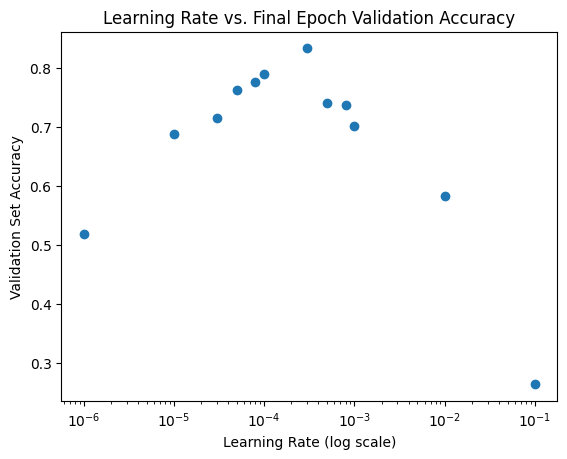

In [ ]:
final_epoch_metrics = metrics_df.query("epoch == 3")
plt.scatter(final_epoch_metrics['initial_learning_rate'], final_epoch_metrics['eval_accuracy']);
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Validation Set Accuracy')
plt.title('Learning Rate vs. Final Epoch Validation Accuracy');